<a href="https://colab.research.google.com/github/Anjali-evi/demo-repo/blob/main/cricket_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Project').getOrCreate()
spark 

In [ ]:
from pyspark.sql import SQLContext as sc

sc=spark.sparkContext

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

tar: spark-3.1.2-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdkamd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-binhadoop2.7"


In [ ]:
!pip install -q findspark
import findspark
findspark.init()
import pyspark

# Importing the csv files from the folder where this colab notebook is stored

In [ ]:
ipl_ball_path_csv ="/content/drive/MyDrive/cloud computing/pyspark/ipl_ball_by_ball.csv"
ipl_ball = spark.read.format('csv').load(ipl_ball_path_csv)

In [ ]:
ipl_matches_path_csv ="/content/drive/MyDrive/cloud computing/pyspark/ipl_matches.csv"
ipl_matches = spark.read.format('csv').load(ipl_matches_path_csv)

In [ ]:
ipl_venue_path_csv ="/content/drive/MyDrive/cloud computing/pyspark/ipl_venue.csv"
ipl_venue = spark.read.format('csv').load(ipl_venue_path_csv)

In [ ]:
ipl_ball.show(5)

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|     _c0|   _c1|  _c2| _c3|          _c4|          _c5|         _c6|         _c7|       _c8|       _c9|        _c10|     _c11|          _c12|            _c13|   _c14|       _c15|                _c16|          _c17|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|  bowling_team|
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|         

In [ ]:
ipl_matches.show(5)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|     _c0|       _c1|            _c2|     _c3|          _c4|                 _c5|                 _c6|                 _c7|          _c8|                 _c9|   _c10|         _c11|      _c12|  _c13|     _c14|          _c15|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|  umpire1|       umpire2|
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Ro

In [ ]:
ipl_venue.show(5)

+--------+--------------------+-------------+
|     _c0|                 _c1|          _c2|
+--------+--------------------+-------------+
|venue_id|               venue|         city|
|       1|Dr. Y.S. Rajasekh...|Visakhapatnam|
|       2|Sharjah Cricket S...|      Sharjah|
|       3|JSCA Internationa...|       Ranchi|
|       4|Saurashtra Cricke...|       Rajkot|
+--------+--------------------+-------------+
only showing top 5 rows



In [ ]:
spark.read.option('header','True').csv(ipl_ball_path_csv)

DataFrame[match_id: string, inning: string, overs: string, ball: string, batsman: string, non_striker: string, bowler: string, batsman_runs: string, extra_runs: string, total_runs: string, non_boundary: string, is_wicket: string, dismissal_kind: string, player_dismissed: string, fielder: string, extras_type: string, batting_team: string, bowling_team: string]

In [ ]:
spark.read.option('header','True').csv(ipl_matches_path_csv)

DataFrame[match_id: string, date: string, player_of_match: string, venue_id: string, neutral_venue: string, team1: string, team2: string, toss_winner: string, toss_decision: string, winner: string, result: string, result_margin: string, eliminator: string, method: string, umpire1: string, umpire2: string]

In [ ]:
spark.read.option('header','True').csv(ipl_venue_path_csv)

DataFrame[venue_id: string, venue: string, city: string]

In [ ]:
type(ipl_ball)

pyspark.sql.dataframe.DataFrame

In [ ]:
type(ipl_matches)

pyspark.sql.dataframe.DataFrame

In [ ]:
type(ipl_venue)

pyspark.sql.dataframe.DataFrame

In [ ]:
ipl_ball.head(3)

[Row(_c0='match_id', _c1='inning', _c2='overs', _c3='ball', _c4='batsman', _c5='non_striker', _c6='bowler', _c7='batsman_runs', _c8='extra_runs', _c9='total_runs', _c10='non_boundary', _c11='is_wicket', _c12='dismissal_kind', _c13='player_dismissed', _c14='fielder', _c15='extras_type', _c16='batting_team', _c17='bowling_team'),
 Row(_c0='419157', _c1='2', _c2='16', _c3='4', _c4='V Kohli', _c5='R Vinay Kumar', _c6='CRD Fernando', _c7='0', _c8='0', _c9='0', _c10='0', _c11='0', _c12='NA', _c13='NA', _c14='NA', _c15='NA', _c16='Royal Challengers Bangalore', _c17='Mumbai Indians'),
 Row(_c0='419157', _c1='2', _c2='16', _c3='5', _c4='V Kohli', _c5='R Vinay Kumar', _c6='CRD Fernando', _c7='1', _c8='0', _c9='1', _c10='0', _c11='0', _c12='NA', _c13='NA', _c14='NA', _c15='NA', _c16='Royal Challengers Bangalore', _c17='Mumbai Indians')]

In [ ]:
ipl_matches.head(3)

[Row(_c0='match_id', _c1='date', _c2='player_of_match', _c3='venue_id', _c4='neutral_venue', _c5='team1', _c6='team2', _c7='toss_winner', _c8='toss_decision', _c9='winner', _c10='result', _c11='result_margin', _c12='eliminator', _c13='method', _c14='umpire1', _c15='umpire2'),
 Row(_c0='335982', _c1='2008-04-18', _c2='BB McCullum', _c3='35', _c4='0', _c5='Royal Challengers Bangalore', _c6='Kolkata Knight Riders', _c7='Royal Challengers Bangalore', _c8='field', _c9='Kolkata Knight Riders', _c10='runs', _c11='140', _c12='N', _c13='NA', _c14='Asad Rauf', _c15='RE Koertzen'),
 Row(_c0='335983', _c1='2008-04-19', _c2='MEK Hussey', _c3='31', _c4='0', _c5='Kings XI Punjab', _c6='Chennai Super Kings', _c7='Chennai Super Kings', _c8='bat', _c9='Chennai Super Kings', _c10='runs', _c11='33', _c12='N', _c13='NA', _c14='MR Benson', _c15='SL Shastri')]

In [ ]:
ipl_venue.head(3)

[Row(_c0='venue_id', _c1='venue', _c2='city'),
 Row(_c0='1', _c1='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', _c2='Visakhapatnam'),
 Row(_c0='2', _c1='Sharjah Cricket Stadium', _c2='Sharjah')]

In [ ]:
ipl_ball.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)



In [ ]:
ipl_matches.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)



In [ ]:
ipl_venue.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



In [ ]:
# read the dataset
ipl_ball_ = spark.read.csv(ipl_ball_path_csv, header = True, inferSchema = True)
ipl_ball_.show(5)
# similarly we can read all the csv using read.csv method
type(ipl_ball_)          # this is the pyspark DataFrame

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|  bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|           0|        0|         

pyspark.sql.dataframe.DataFrame

In [ ]:
ipl_matches_ = spark.read.csv(ipl_matches_path_csv, header = True, inferSchema = True)
ipl_matches_.show(5)
type(ipl_matches_)      # this is the pyspark DataFrame

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|  umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super Kings| C

pyspark.sql.dataframe.DataFrame

In [ ]:
ipl_venue_ = spark.read.csv(ipl_venue_path_csv, header = True, inferSchema = True)
ipl_venue_.show(5)
type(ipl_venue_)           # this is the pyspark DataFrame

+--------+--------------------+-------------+
|venue_id|               venue|         city|
+--------+--------------------+-------------+
|       1|Dr. Y.S. Rajasekh...|Visakhapatnam|
|       2|Sharjah Cricket S...|      Sharjah|
|       3|JSCA Internationa...|       Ranchi|
|       4|Saurashtra Cricke...|       Rajkot|
|       5|Shaheed Veer Nara...|       Raipur|
+--------+--------------------+-------------+
only showing top 5 rows



pyspark.sql.dataframe.DataFrame

Before applying 'select' mthod, we have to make sure that the type of the frame is 'pyspark.sql.dataframe.DataFrame' 
Else it will throw an error

In [ ]:
ipl_ball_.select('batsman').show()

+-------------+
|      batsman|
+-------------+
|      V Kohli|
|      V Kohli|
|R Vinay Kumar|
|R Vinay Kumar|
|      V Kohli|
|R Vinay Kumar|
|R Vinay Kumar|
|R Vinay Kumar|
|      V Kohli|
|      V Kohli|
|      V Kohli|
|R Vinay Kumar|
|R Vinay Kumar|
| Pankaj Singh|
|R Vinay Kumar|
| Pankaj Singh|
|     A Kumble|
|    R McLaren|
| SR Tendulkar|
| SR Tendulkar|
+-------------+
only showing top 20 rows



In [ ]:
ipl_matches_.select('player_of_match').show()

+---------------+
|player_of_match|
+---------------+
|    BB McCullum|
|     MEK Hussey|
|    MF Maharoof|
|     MV Boucher|
|      DJ Hussey|
|      SR Watson|
|       V Sehwag|
|      ML Hayden|
|      YK Pathan|
|  KC Sangakkara|
|      SR Watson|
|       JDP Oram|
|   AC Gilchrist|
|      SM Katich|
|       MS Dhoni|
|  ST Jayasuriya|
|     GD McGrath|
|       SE Marsh|
|    SA Asnodkar|
|       V Sehwag|
+---------------+
only showing top 20 rows



In [ ]:
ipl_venue_.select('city').show()

+--------------+
|          city|
+--------------+
| Visakhapatnam|
|       Sharjah|
|        Ranchi|
|        Rajkot|
|        Raipur|
|          Pune|
|          Pune|
|Port Elizabeth|
|        Nagpur|
|        Mumbai|
|        Mumbai|
|        Mumbai|
|       Kolkata|
|         Kochi|
|     Kimberley|
|        Kanpur|
|  Johannesburg|
|        Jaipur|
|        Indore|
|     Hyderabad|
+--------------+
only showing top 20 rows



In [ ]:
ipl_ball_.select(['match_id','batsman']).show()

+--------+-------------+
|match_id|      batsman|
+--------+-------------+
|  419157|      V Kohli|
|  419157|      V Kohli|
|  419157|R Vinay Kumar|
|  419157|R Vinay Kumar|
|  419157|      V Kohli|
|  419157|R Vinay Kumar|
|  419157|R Vinay Kumar|
|  419157|R Vinay Kumar|
|  419157|      V Kohli|
|  419157|      V Kohli|
|  419157|      V Kohli|
|  419157|R Vinay Kumar|
|  419157|R Vinay Kumar|
|  419157| Pankaj Singh|
|  419157|R Vinay Kumar|
|  419157| Pankaj Singh|
|  419157|     A Kumble|
|  419157|    R McLaren|
|  419157| SR Tendulkar|
|  419157| SR Tendulkar|
+--------+-------------+
only showing top 20 rows



Check datatypes of the columns in the frames

In [ ]:
ipl_ball_.dtypes

[('match_id', 'int'),
 ('inning', 'int'),
 ('overs', 'int'),
 ('ball', 'int'),
 ('batsman', 'string'),
 ('non_striker', 'string'),
 ('bowler', 'string'),
 ('batsman_runs', 'int'),
 ('extra_runs', 'int'),
 ('total_runs', 'int'),
 ('non_boundary', 'int'),
 ('is_wicket', 'int'),
 ('dismissal_kind', 'string'),
 ('player_dismissed', 'string'),
 ('fielder', 'string'),
 ('extras_type', 'string'),
 ('batting_team', 'string'),
 ('bowling_team', 'string')]

In [ ]:
ipl_matches_.dtypes

[('match_id', 'int'),
 ('date', 'string'),
 ('player_of_match', 'string'),
 ('venue_id', 'int'),
 ('neutral_venue', 'int'),
 ('team1', 'string'),
 ('team2', 'string'),
 ('toss_winner', 'string'),
 ('toss_decision', 'string'),
 ('winner', 'string'),
 ('result', 'string'),
 ('result_margin', 'string'),
 ('eliminator', 'string'),
 ('method', 'string'),
 ('umpire1', 'string'),
 ('umpire2', 'string')]

In [ ]:
ipl_venue_.dtypes

[('venue_id', 'int'), ('venue', 'string'), ('city', 'string')]

In [ ]:
eli = ipl_matches_.select('eliminator')

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import LongType

Now transforming this frame to temp table

In [ ]:
ipl_ball_.createOrReplaceTempView('table_ball')

In [ ]:
ipl_matches_.createOrReplaceTempView('table_matches')

In [ ]:
ipl_venue_.createOrReplaceTempView('table_venue')

In [ ]:
for table in spark.catalog.listTables():
  print(table.name)

table_ball
table_matches
table_venue


In [ ]:
from pyspark.sql.functions import sum,avg,max,min,mean,count

In [ ]:
ipl_matches_.filter(ipl_matches_['eliminator'] == 'Y').show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+------+-------------+----------+------+------------+------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner|result|result_margin|eliminator|method|     umpire1|     umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+------+-------------+----------+------+------------+------------+
|  392190|2009-04-23|      YK Pathan|      33|            1|Kolkata Knight Ri...|    Rajasthan Royals|Kolkata Knight Ri...|        field|    Rajasthan Royals|   tie|           NA|         Y|    NA|   MR Benson|   M Erasmus|
|  419121|2010-03-21|       J Theron|      29|            0| Chennai Super Kings|     Kings XI Punjab| C

In [ ]:
type(ipl_matches_)

pyspark.sql.dataframe.DataFrame

In [ ]:
type(ipl_ball_)

pyspark.sql.dataframe.DataFrame

In [ ]:
type(ipl_venue_)

pyspark.sql.dataframe.DataFrame

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

**1. Find the top 3 venues which hosted the most number of eliminator matches?**

In [ ]:
# answer
q1 =(spark.sql('select venue_id , venue from table_venue where venue_id in (select venue_id from table_matches where eliminator == "Y" )').sort('venue_id', ascending= False ))

In [ ]:
type(q1)

pyspark.sql.dataframe.DataFrame

**2. Return most number of catches taken by a player in IPL history?**

In [ ]:
# answer
q2 = (spark.sql('select bowler , sum(is_wicket) as Sum from table_ball group By bowler').sort('Sum' , ascending = False))

In [ ]:
type(q2)

sqlite3.Cursor

**3. Write a query to return a report for highest wicket taker in matches which were affected by Duckworth-Lewis’s method (D/L method).**

In [ ]:
# q3 = spark.sql('select distinct method from table_matches').show()

In [ ]:
# a query went WRONG
# spark.sql('select match_id , bowler , sum(is_wicket) as sum from table_ball where match_id in (select match_id, method from table_matches where method == "D/L")')

In [ ]:
# q3 =spark.sql('select distinct match_id , method from table_matches where method == "D/L"').show()

In [ ]:
# answer
q3 = spark.sql('select match_id , bowler, sum(is_wicket) as Sum from table_ball where match_id in (select match_id from table_matches where method == "D/L") group by match_id , bowler').sort('Sum', ascending = False)

**4. Write a query to return a report for highest strike rate by a batsman in non powerplay overs(7-20 overs)**

In [ ]:
from pyspark.sql.functions import lit

In [ ]:
from pyspark.sql.functions import col

In [ ]:
import decimal
from pyspark.sql.types import ArrayType,IntegerType

In [ ]:
from traitlets.traitlets import Integer
from pandas.core.arrays import integer

In [ ]:
if 'strike_rate' not in ipl_ball_.columns:
              ipl_ball_ = ipl_ball_.withColumn("strike_rate", ((ipl_ball_.total_runs / ipl_ball_.ball) * 1000)).show()

AttributeError: ignored

In [ ]:
ipl_ball_ = ipl_ball_.drop('strike_rate')

AttributeError: ignored

In [ ]:
ipl_ball_.show()

AttributeError: ignored

In [ ]:
spark.sql('select batsman, strike_rate as strike from table_ball where overs between 7 and 20  group by batsman , strike').show()

AnalysisException: ignored

**5. Write a query to return a report for highest extra runs in a venue (stadium,city).**

In [ ]:
spark.sql('select match_id, max(extra_runs) as exRuns from table_ball group by match_id').sort('exRuns', ascending = False).show(10)

+--------+------+
|match_id|exRuns|
+--------+------+
|  729309|     7|
|  419157|     5|
|  392222|     5|
|  598034|     5|
|  501213|     5|
|  419163|     5|
|  980927|     5|
|  829761|     5|
|  598042|     5|
|  548336|     5|
+--------+------+
only showing top 10 rows



**6. Write a query to return a report for the cricketers with the most number of players of the
match award in neutral venues.**


In [ ]:
# spark.sql('select venue_id , venue as stadium , city from table_venue where venue_id in ()')

In [ ]:
spark.sql(' select table_venue.venue as stadium , table_venue.city , table_venue.venue_id from table_venue join table_matches on table_venue.venue_id = table_matches.venue_id').show(10)

+--------------------+----------+--------+
|             stadium|      city|venue_id|
+--------------------+----------+--------+
|M.Chinnaswamy Sta...| Bengaluru|      35|
|Punjab Cricket As...|Chandigarh|      31|
|    Feroz Shah Kotla|     Delhi|      27|
|    Wankhede Stadium|    Mumbai|      14|
|        Eden Gardens|   Kolkata|      15|
|Sawai Mansingh St...|    Jaipur|      20|
|Rajiv Gandhi Inte...| Hyderabad|      22|
|MA Chidambaram St...|   Chennai|      29|
|Rajiv Gandhi Inte...| Hyderabad|      22|
|Punjab Cricket As...|Chandigarh|      31|
+--------------------+----------+--------+
only showing top 10 rows



In [ ]:
# spark.sql('select venue as stadium, max(extra_runs) as exRuns , city from table_venue where venue_id in (select table_matches.venue_id, table_matches.match_id , table_ball.match_id from table_matches join table_ball on table_matches.match_id = table_ball.match_id ) group by stadium')

In [ ]:
# answer
spark.sql('select table_venue.venue as stadium , table_venue.city, max(extra_runs) as exRuns from ((table_venue join table_matches) join table_ball) group by stadium, table_venue.city').show(5)

+--------------------+----------+------+
|             stadium|      city|exRuns|
+--------------------+----------+------+
|Himachal Pradesh ...|Dharamsala|     7|
|JSCA Internationa...|    Ranchi|     7|
|MA Chidambaram St...|   Chennai|     7|
|Holkar Cricket St...|    Indore|     7|
|        Eden Gardens|   Kolkata|     7|
+--------------------+----------+------+
only showing top 5 rows



In [ ]:
spark.sql('select player_of_match , winner , max(neutral_venue) as Nvenue from table_matches group by player_of_match, winner').show(5)

+---------------+-------------------+------+
|player_of_match|             winner|Nvenue|
+---------------+-------------------+------+
|   F du Plessis|Chennai Super Kings|     0|
|        SS Iyer|   Delhi Daredevils|     0|
|       K Rabada|     Delhi Capitals|     0|
|      DA Warner|Sunrisers Hyderabad|     0|
|     RD Gaikwad|Chennai Super Kings|     0|
+---------------+-------------------+------+
only showing top 5 rows



In [ ]:
spark.sql('select distinct player_of_match from table_matches ').show(5)

+---------------+
|player_of_match|
+---------------+
|     TM Dilshan|
|     S Anirudha|
|  Kuldeep Yadav|
| M Muralitharan|
|     KA Pollard|
+---------------+
only showing top 5 rows



In [ ]:
# answer
spark.sql('select max(player_of_match) from table_matches where neutral_venue == 1').show(5)

+--------------------+
|max(player_of_match)|
+--------------------+
|        Yuvraj Singh|
+--------------------+



**7. Write a query to get a list of top 10 players with the highest batting average Note: Batting
average is the total number of runs scored divided by the number of times they have been
out (Make sure to include run outs (on non-striker end) as valid out while calculating average).**

In [ ]:
spark.sql('select player_dismissed from table_ball where player_dismissed != "NA"').show(5)

+----------------+
|player_dismissed|
+----------------+
|         V Kohli|
|    Pankaj Singh|
|       MK Pandey|
|       JH Kallis|
|     JR Philippe|
+----------------+
only showing top 5 rows



**8. Write a query to find out who has officiated (as an umpire) the most number of matches in
IPL**

In [ ]:
spark.sql('select max(umpire1), max(umpire2)from table_matches').show(3)

+------------+------------+
|max(umpire1)|max(umpire2)|
+------------+------------+
|    YC Barde|    YC Barde|
+------------+------------+



In [ ]:
# query went wrong
# spark.sql('select max(umpire) from table_matches')

In [ ]:
# query went wrong
# spark.sql('select match_id,  max(umpire1) as Umpire1 , max(umpire2) as Umpire2 from table_matches ')

**9. Find venue details of the match where V Kohli scored his highest individual runs in IPL**

In [ ]:
# spark.sql('select venue_id , venue as stadium , city from table_venue where venue_id in (select )')

In [ ]:
# query went wrong
# spark.sql('select table_venue.venue_id, table_venue.venue, table_venue.city,  sum(table_ball.batsman_runs) from (((table_venue join table_matches on table_venue.venue_id = table_matches.venue_id) join table_ball) where table_ball.batsman == "V Kohli")')

In [ ]:
# query went wrong
# spark.sql('select table_venue.venue_id , table_venue.venue , table_venue.city , table_ball.batsman , sum(table_ball.batsman_runs) from ((table_ball join table_matches on table_ball.match_id = table_matches.match_id where table_ball.batsman == "V Kohli")) join (table_venue on table_venue.venue_id = table_matches.match_id))')

In [ ]:
# trial query
spark.sql('select batsman as name , sum(batsman_runs) as runs from table_ball where batsman == "V Kohli" group by name').show()

+-------+----+
|   name|runs|
+-------+----+
|V Kohli|5878|
+-------+----+



In [ ]:
# query went wrong
# spark.sql('select venue, city, batsman, sum(batsman_runs) from ((table_venue join table_matches) on (table_venue.venue_id = table_matches.venue_id))join (table_ball on table_matches.match_id = table_ball.match_id) where table_ball.batsman == "V Kohli")')

In [ ]:
# query went wrong
# spark.sql('select tb.batsman as name, sum(tb.batsman_runs) as total_scores,tv.venue as stadium,tv.city from((table_ball as tb join table_matches as tm on tb.match_id = tm.match_id)join table_venue as tv on tv.venue_id = tm.venue_id) where tb.batsman == "V Kohli" group by name ,stadium , city, ')

In [ ]:
spark.sql('select venue as stadium , city , batsman as name , sum(batsman_runs) as score from table_venue join table_matches on table_venue.venue_id = table_matches.venue_id join table_ball on table_matches.match_id = table_ball.match_id where table_ball.batsman == "V Kohli" group by stadium, city, name ').sort('score', ascending = False).show(5)

+--------------------+---------+-------+-----+
|             stadium|     city|   name|score|
+--------------------+---------+-------+-----+
|M.Chinnaswamy Sta...|Bengaluru|V Kohli| 2346|
|    Feroz Shah Kotla|    Delhi|V Kohli|  428|
|    Wankhede Stadium|   Mumbai|V Kohli|  400|
|Rajiv Gandhi Inte...|Hyderabad|V Kohli|  335|
|        Eden Gardens|  Kolkata|V Kohli|  307|
+--------------------+---------+-------+-----+
only showing top 5 rows



**10. Creative Case study:
Please analyze how winning/losing tosses can impact a match and it's result?**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ipl_ball_.show(10)

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|  bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|           0|        0|         

In [ ]:
ipl_matches_.show(10)

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|  umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+---------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super Kings| C

In [ ]:
ipl_venue_.show(10)

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
+--------+--------------------+--------------+
only showing top 10 rows



In [ ]:
# spark.sql('(select (count(toss_winner) * 100) where  toss_decision == "field" and toss_winner == winner) / (select count(match_id) as total_matches from table_matches)').show(3)

In [ ]:
# field_winner = pd.DataFrame(spark.sql('select (count(toss_winner)*100) as t_win / (select count(match_id) from table_matches) where toss_decision == "field" and toss_winner == winner').show())

In [ ]:
type(field_winner)

pandas.core.frame.DataFrame

In [ ]:
spark.sql('select (select (count(toss_winner)/count(match_id))*100 as field_win from table_matches where toss_decision == "field" and toss_winner == winner) / (select 100*(count(toss_winner)/(selct count(match_id) from table_matches) from table_matches where toss_decision == "bat" and toss_winner == winner) from table_matches').show(3)

+-------------------------------------+
|(scalarsubquery() / scalarsubquery())|
+-------------------------------------+
|                                  1.0|
|                                  1.0|
|                                  1.0|
+-------------------------------------+
only showing top 3 rows



In [ ]:
spark.sql('select (100*count(toss_winner)) /(select count(match_id)  from table_matches) from table_matches where toss_decision == "field" and toss_winner == winner').show(3)

+-----------------------------------------------+
|((100 * count(toss_winner)) / scalarsubquery())|
+-----------------------------------------------+
|                             33.455882352941174|
+-----------------------------------------------+



In [ ]:
spark.sql('select (100* count(toss_winner))/ (select count(match_id) from table_matches) from table_matches where toss_decision == "bat" and toss_winner == winner').show(3)

+-----------------------------------------------+
|((100 * count(toss_winner)) / scalarsubquery())|
+-----------------------------------------------+
|                             17.769607843137255|
+-----------------------------------------------+



In [ ]:
spark.sql('select 100*(count(toss_winner))/ (select count(match_id) from table_matches ) from table_matches where toss_decision == "bat" and toss_winner == winner').show()

+-----------------------------------------------+
|((100 * count(toss_winner)) / scalarsubquery())|
+-----------------------------------------------+
|                             17.769607843137255|
+-----------------------------------------------+



In [ ]:
spark.sql('select count(match_id) from table_matches').show()

+---------------+
|count(match_id)|
+---------------+
|            816|
+---------------+



In [ ]:
# answer
field_win = (spark.sql('select distinct( (select 100*(count(toss_winner)) from table_matches where toss_winner == winner and toss_decision = "field") / (select count(match_id) from table_matches)) from table_matches '))

In [ ]:
f_win = field_win.toPandas()
field_win.collect()[0][0]

33.455882352941174

In [ ]:
bat_win = spark.sql('select distinct( (select 100*(count(toss_winner)) from table_matches where toss_winner == winner and toss_decision = "bat")  / (select count(match_id) from table_matches)) from table_matches ')

In [ ]:
b_win = bat_win.toPandas()
bat_win.collect()[0][0]

17.769607843137255

In [ ]:
b_win.head()

,(scalarsubquery() / scalarsubquery())
0,17.769608


In [ ]:
t_matches = spark.sql('select count(match_id) from table_matches')

In [ ]:
t_match = t_matches.toPandas()
t_matches.collect()[0][0]

816

In [ ]:
t_matches = pd.Series(t_matches)
t_matches.head()

In [ ]:
table_analysis = {'field_win': [field_win.collect()[0][0]] , 'bat_win': [bat_win.collect()[0][0]], 'total_matches': [t_matches.collect()[0][0]]}

In [ ]:
bat_win.collect()[0][0]

17.769607843137255

In [ ]:
print(table_analysis)

{'field_win': [33.455882352941174], 'bat_win': [17.769607843137255], 'total_matches': [816]}


In [ ]:
new = pd.DataFrame.from_dict(table_analysis)

In [ ]:
print(new)

   field_win    bat_win  total_matches
0  33.455882  17.769608            816


In [ ]:
new_df_f = pd.DataFrame({'f_win': 33.455, 'total_matches': 816 } , index = ['f_win', 'total_matches'] )
new_df_b = pd.DataFrame({'b_win': 17.7696, 'total_matches': 816}, index = ['b_win', 'total_matches'] )

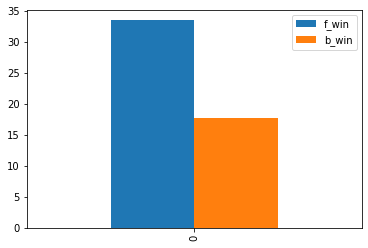

In [ ]:
new_df.plot.bar()

**Section 3: Expose data**

**Section 1 : Loading data from csv's to the database**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create database 
!pip install pysqlite3 

In [ ]:
import sqlite3 as sql
import csv

In [ ]:
conn = sql.connect('cricket.db')

In [ ]:
# create a cursor
conn = conn.cursor()

**Creating table ball and loading the dataset csv data into the table**

In [ ]:
sql.connect('ipl.db')

In [ ]:
conn = sql.connect(":")

In [ ]:
c = conn.cursor()

**creating table ipl_ball**

In [ ]:
import sqlite3

try:
  conn = sql.connect('ipl.db')
  c = conn.cursor()

  create_table_ball = '''create table table_ball (match_id intger not null , 
                                                  inning integer , 
                                                  overs integer, 
                                                  ball integer , 
                                                  batsman text not null , 
                                                  non_striker text , 
                                                  bowler text , 
                                                  batsman_runs integer, 
                                                  extra_runs integer, 
                                                  total_runs integer , 
                                                  non_boundary integer, 
                                                  is_wicket integer , 
                                                  dismissal_kind text , 
                                                  player_dismissed text,
                                                  fielder text ,
                                                  extras_type text , 
                                                  batting_team text , 
                                                  bowling_team text, 
                                                  foreign key (match_id) references ipl_matches(match_id))'''
  c.execute(create_table_ball)
  print("Successfully Connected to ipl.db")

  file = open ('/content/drive/MyDrive/cloud computing/pyspark/ipl_ball_by_ball.csv')
  contents_ball = csv.reader(file)
  print('table_ball table created')
  

except sqlite3.Error as error:
      print("Error while creating a table", error)

finally:
    if conn:
        conn.commit()
       


Successfully Connected to ipl.db
table_ball table created


In [ ]:
# c.execute('drop table table_ball;')

**creating table ipl_matches**

In [ ]:
try:
  conn = sql.connect('ipl.db')
  c = conn.cursor()

  create_table_matches = '''create table table_matches (match_id integer primary key , 
                                                        date date , 
                                                        player_of_match text , 
                                                        venue_id integer , 
                                                        neutral_venue integer , 
                                                        team1 text , team2 text , 
                                                        toss_winner text , 
                                                        toss_decision text , 
                                                        winner text , 
                                                        result text , 
                                                        result_margin text , 
                                                        eliminator text , 
                                                        method text , 
                                                        umpire1 text , 
                                                        umpire2 text, 
                                                        foreign key(venue_id) references ipl_venue(venue_id))'''
  conn.execute(create_table_matches)
  print('Successfully connected to ipl.db')


  file = open('/content/drive/MyDrive/cloud computing/pyspark/ipl_matches.csv')
  contents_matches = csv.reader(file)
  print('table_matches table created')
  c.execute('select * from table_matches limit 3')

except sqlite3.Error as error:
  print("Error while creating a table", error)

finally:
    if conn:
        conn.commit()
        
        print("datbase connection is closed")



Successfully connected to ipl.db
table_matches table created
datbase connection is closed


In [ ]:
c.execute('drop table table_matches;')

**Creating table venue**

In [ ]:
try:
    conn = sql.connect('ipl.db')
    c = conn.cursor()

    create_table_venue = ''' create table table_venue(
                              venue_id integer primary key, venue text , city text
    )  '''
    conn.execute(create_table_venue)
    print('Successfully connected to ipl.db')

    file = open('/content/drive/MyDrive/cloud computing/pyspark/ipl_venue.csv')
    contents_venue = csv.reader(file)
    print('venue table created')
    

except sqlite3.Error as error:
  print("Error while creating a table", error)

finally:
    if conn:
        conn.commit()
        
        print("datbase connection is closed")
  

Successfully connected to ipl.db
venue table created
datbase connection is closed


In [ ]:
c.execute('drop table table_venue;')

**Insert values into table ipl_ball**

In [ ]:
conn = sql.connect('ipl.db')
c = conn.cursor()

insert_records_ball = "INSERT INTO table_ball (match_id, inning , overs,ball,batsman,non_striker,bowler, batsman_runs,extra_runs,total_runs, non_boundary , is_wicket, dismissal_kind,player_dismissed,fielder,extras_type, batting_team , bowling_team) VALUES(?, ?,?,?, ?,?,?, ?,?,?, ?,?,?, ?,?,?, ?,?)"
conn.executemany(insert_records_ball, contents_ball)

select_all = "SELECT * FROM table_ball"
rows = conn.execute(select_all).fetchall()



conn.commit()


In [ ]:
conn.execute('''drop table table_ball ''')

**Insert values into table ipl_matches**

In [ ]:
conn = sql.connect('ipl.db')
c = conn.cursor()

insert_record_matches = '''insert into table_matches(match_id, date, player_of_match , venue_id, neutral_venue , team1, team2 , toss_winner , toss_decision, winner , result , result_margin , eliminator , method, umpire1, umpire2)values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?) '''
conn.executemany(insert_record_matches, contents_matches)

select_all = "SELECT * FROM table_matches"
rows = conn.execute(select_all).fetchall()


conn.commit()

**Insert values into table venue**

In [ ]:
conn = sql.connect('ipl.db')
c= conn.cursor()

insert_record_venue = ''' insert into table_venue(venue_id,venue, city) values (?,?,?) '''
conn.executemany(insert_record_venue, contents_venue)

select_all = "SELECT * FROM table_venue"
rows = conn.execute(select_all).fetchall()


conn.commit()

**Query1**

In [ ]:
import json

q1 = c.execute('select venue_id , venue from table_venue where venue_id in (select venue_id from table_matches where eliminator == "Y" ) order by venue_id desc limit 3;')
for row in q1:
  dict1 = {"venue_id": row[0], "venue": row[1]}
  j = json.dumps(dict1)
  print(j)
type(q1)


{"venue_id": 38, "venue": "Sheikh Zayed Stadium"}
{"venue_id": 37, "venue": "Sardar Patel Stadium, Motera"}
{"venue_id": 35, "venue": "M.Chinnaswamy Stadium"}


sqlite3.Cursor

**Query2**

In [ ]:

q2 = c.execute('select bowler , sum(is_wicket) as sum from table_ball group by bowler limit 4')
for row in q2:
  dict1 = {"bowler": row[0], "sum": row[1]}
  j = json.dumps(dict1)
  print(j)
    

{"bowler": "A Ashish Reddy", "sum": 19}
{"bowler": "A Chandila", "sum": 11}
{"bowler": "A Choudhary", "sum": 5}
{"bowler": "A Dananjaya", "sum": 0}


In [ ]:
q3 = c.execute('select match_id , bowler, sum(is_wicket) as Sum from table_ball where match_id in (select match_id from table_matches where method == "D/L") group by match_id , bowler limit 4')
for row in q3 :
  dict1 = (row[0], row[1], row[2])
  j = json.dumps(dict1)
  print(j)

[336022, "A Mishra", 1]
[336022, "GD McGrath", 1]
[336022, "IK Pathan", 0]
[336022, "JR Hopes", 2]


**Creating a python class**

In [ ]:
import json
class Database():
  def initialize_connect():
    try:
        conn = sql.connect('ipl.db')
        c = conn.cursor()

    except sqlite3.Error as error:
        print("Error while connecting to database", error)

    def result_set():
                

                result2 = c.execute('select bowler , sum(is_wicket) as Sum from table_ball group By bowler ')

**function1**

In [ ]:
import json
def get_query1_result():
  q1 = c.execute('select venue_id , venue from table_venue where venue_id in (select venue_id from table_matches where eliminator == "Y" ) order by venue_id desc limit 3;')
  for row in q1:
    dict1 = {"venue_id": row[0], "venue": row[1]}
    j = json.dumps(dict1)
    print(j)
get_query1_result()

{"venue_id": 38, "venue": "Sheikh Zayed Stadium"}
{"venue_id": 37, "venue": "Sardar Patel Stadium, Motera"}
{"venue_id": 35, "venue": "M.Chinnaswamy Stadium"}


**function2**

**2. Return most number of catches taken by a player in IPL history?**

In [ ]:
def get_query2_result():
  q2 = c.execute('select bowler , sum(is_wicket) as sum from table_ball order by sum desc limit 4')
  for row in q2:
    dict1 = {"bowler": row[0], "sum": row[1]}
    j = json.dumps(dict1)
    print(j)
get_query2_result()


{"bowler": "TK Curran", "sum": 9495.0}


**3. Write a query to return a report for highest wicket taker in matches which were affected by
Duckworth-Lewis’s method (D/L method).**

In [ ]:
def get_query3_result():
  q3 = c.execute('select match_id,bowler, sum(is_wicket) as sum from table_ball where match_id in (select match_id from table_matches where method == "D/L")order by sum')
  for row in q3:
    dict1 = {"match_id": row[0], "bowler": row[1],"sum": row[2]}
    j = json.dumps(dict1)
    print(j)
get_query3_result()



{"match_id": 733993, "bowler": "A Mishra", "sum": 155}


**4. Write a query to return a report for highest strike rate by a batsman in non powerplay
overs(7-20 overs)**

**5. Write a query to return a report for highest extra runs in a venue (stadium, city).**

In [ ]:
def get_query5_result():
  q5 = c.execute('select t_v.venue as stadium , t_v.city , max(t_b.extra_runs) as exRuns from ((table_venue as t_v join table_matches as t_m)join table_ball as t_b) group by stadium , city ')
  for row in q5:
    dict1 = {"match_id": row[0], "bowler": row[1],"sum": row[2]}
    j = json.dumps(dict1)
    print(j)
get_query5_result()

In [ ]:
conn.execute('select t_v.venue as stadium , t_v.city , max(t_b.extra_runs) as exRuns from ((table_venue as t_v join table_matches as t_m)join table_ball as t_b) group by stadium , city ')

NameError: ignored

**6. Write a query to return a report for the cricketers with the most number of players of the
match award in neutral venues.**

In [ ]:
def get_query6_result():
  q6 = c.execute('select max(player_of_match) neutral_venue from table_matches where neutral_venue == 1')
  for row in q6:
    dict1 = {"player_of_match": row[0], "neutral_venue": row[1]}
    j = json.dumps(dict1)
    print(j)
get_query6_result()

**7. Write a query to get a list of top 10 players with the highest batting average Note: Batting
average is the total number of runs scored divided by the number of times they have been
out (Make sure to include run outs (on non-striker end) as valid out while calculating average).**

In [ ]:
def get_query7_result():
  q7 = c.execute('')
  for row in q7:
    dict1 = {"match_id": row[0], "bowler": row[1],"sum": row[2]}
    j = json.dumps(dict1)
    print(j)
get_query7_result()

**8. Write a query to find out who has officiated (as an umpire) the most number of matches in
IPL.**

In [ ]:
def get_query8_result():
  q8 = c.execute('select max(umpire1), max(umpire2)from table_matches')
  for row in q8:
    dict1 = {"umpire1": row[0], "umpire2": row[1]}
    j = json.dumps(dict1)
    print(j)
get_query8_result()

{"umpire1": "YC Barde", "umpire2": "YC Barde"}


**9. Find venue details of the match where V Kohli scored his highest individual runs in IPL**

In [ ]:
def get_query9_result():
  q9 = c.execute('select venue as stadium , city , batsman as name , sum(batsman_runs) as score from table_venue join table_matches on table_venue.venue_id = table_matches.venue_id join table_ball on table_matches.match_id = table_ball.match_id where table_ball.batsman == "V Kohli" order by score ')
  for row in q9:
    dict1 = {"match_id": row[0], "bowler": row[1],"sum": row[2]}
    j = json.dumps(dict1)
    print(j)
get_query9_result()

**10. Creative Case study:
Please analyze how winning/losing tosses can impact a match and it's result?**

In [ ]:
def get_query3_result():
  q3 = c.execute('select match_id,bowler, sum(is_wicket) as sum from table_ball where match_id in (select match_id from table_matches where method == "D/L")order by sum')
  for row in q3:
    dict1 = {"match_id": row[0], "bowler": row[1],"sum": row[2]}
    j = json.dumps(dict1)
    print(j)
get_query3_result()